<a href="https://www.kaggle.com/code/arthurcornelio/arthur-spotify-goi-nia?scriptVersionId=185616077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Merging all datasets

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import glob
import os

# Assuming you have already read the tracks_info DataFrame
tracks_info = pd.read_csv("/kaggle/input/brazil-regional-spotify-charts/tracks_info-update.csv")

# Define the directory where your files are located
directory = '/kaggle/input/brazil-regional-spotify-charts/regional/**/'
file_paths = glob.glob(directory + "/*.csv")

# List to store individual DataFrames
dfs = []

# Loop through each file path, read the dataset, and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    
    # Extract the filename without the extension
    file_name = os.path.basename(file_path)
    file_name = os.path.splitext(file_name)[0]
    
    # Extract the folder name (last directory in the path)
    folder_name = os.path.basename(os.path.dirname(file_path))
    
    # Create new columns with the file name and folder name
    df['File_Name'] = file_name
    df['Folder_Name'] = folder_name
    
    dfs.append(df)

# Concatenate all DataFrames in the list
concatenated_df = pd.concat(dfs, ignore_index=True)  # Set ignore_index to True to reset the index

# Merge the concatenated_df with tracks_info based on common keys 'id' and 'uri'
merged_df = pd.merge(concatenated_df, tracks_info, left_on='uri', right_on='id', how='inner')

# Now, df contains all the datasets combined into a single DataFrame

In [2]:
#200k rows
merged_df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000,201649.000000
mean,2792.450649,0.372708,0.681039,180473.071753,0.728706,0.005114,5.462725,0.339298,-4.843644,0.504877,0.116959,131.019428,3.990746,0.661180
std,1644.992962,0.207915,0.132458,69526.717243,0.153821,0.050269,3.507958,0.289752,2.030135,0.499977,0.112994,26.426900,0.328337,0.188276
min,3.000000,0.000076,0.169000,59586.000000,0.091100,0.000000,0.000000,0.018800,-17.665000,0.000000,0.024300,56.271000,1.000000,0.037400
25%,1345.000000,0.197000,0.591000,153231.000000,0.642000,0.000000,2.000000,0.104000,-5.704000,0.000000,0.046100,115.065000,4.000000,0.532000
50%,2621.000000,0.353000,0.678000,168840.000000,0.750000,0.000000,6.000000,0.209000,-4.460000,1.000000,0.069000,130.077000,4.000000,0.673000
75%,4422.000000,0.537000,0.774000,187636.000000,0.850000,0.000000,9.000000,0.547000,-3.642000,1.000000,0.137000,151.175000,4.000000,0.801000
max,5189.000000,0.970000,0.985000,930534.000000,0.982000,0.939000,11.000000,0.980000,1.906000,1.000000,0.885000,207.173000,5.000000,0.981000


# Just numerical columns for PCA and clustering

In [3]:
import pandas as pd

def filter_numeric_columns(df):
    """
    Filters a DataFrame to retain only columns with numeric data types.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.

    Returns:
    pd.DataFrame: A DataFrame containing only numeric columns.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df

# Example usage
# Assuming df is your DataFrame
# df = pd.read_csv("your_file.csv")

# Filter to get only numeric columns
numeric_df = filter_numeric_columns(merged_df)



In [4]:
numeric_df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,4968,0.449,0.743,166775.0,0.865,0.000003,6,0.2970,-3.897,1,0.0315,129.999,4,0.794
1,2129,0.338,0.691,173698.0,0.708,0.000000,9,0.3110,-4.821,1,0.1950,160.018,4,0.602
2,3758,0.176,0.588,178812.0,0.893,0.000000,6,0.8030,-2.743,1,0.0866,153.778,4,0.626
3,5012,0.503,0.726,164075.0,0.814,0.000000,7,0.7530,-3.853,1,0.0310,141.934,4,0.892
4,4963,0.237,0.879,130403.0,0.886,0.000000,7,0.0615,-3.287,1,0.0508,125.973,4,0.966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201644,2350,0.378,0.627,183413.0,0.818,0.000000,1,0.2460,-3.086,1,0.1030,161.857,4,0.449
201645,1612,0.586,0.601,276480.0,0.360,0.000000,9,0.0882,-7.791,0,0.0877,124.993,4,0.335
201646,67,0.288,0.623,302118.0,0.656,0.000000,9,0.1050,-3.662,0,0.2290,112.823,5,0.576
201647,4666,0.120,0.790,233250.0,0.595,0.000000,1,0.2750,-6.626,1,0.1730,99.916,4,0.607


OK #criar DF com coluna com data 
OK #merge todos DF de Goiânia
OK #merge com tracks e outras cidades
#estudar de novo, time series e non supervised

### For memory issues, we will split the 200k dataset with a chunk function (not necessary when working just with numerical)

In [5]:
import pandas as pd

def split_dataframe(df, chunk_size=10000):
    """
    Splits a DataFrame into chunks of a specified size.

    Parameters:
    df (pd.DataFrame): The DataFrame to split.
    chunk_size (int): The size of each chunk.

    Returns:
    List[pd.DataFrame]: A list of DataFrame chunks.
    """
    num_chunks = len(df) // chunk_size + (1 if len(df) % chunk_size != 0 else 0)
    return [df[i*chunk_size:(i+1)*chunk_size] for i in range(num_chunks)]

# Assuming merged_df is your merged DataFrame
# merged_df = ...

# Split merged_df into chunks of 10,000 rows each
chunks = split_dataframe(merged_df, chunk_size=10000)

# Example: Print the number of chunks and the first few rows of the first chunk
print(f'Number of chunks: {len(chunks)}')
chunks[0].head()


Number of chunks: 21


,rank,uri,track_name,peak,prev,streak,artist_names_x,File_Name,Folder_Name,Unnamed: 0,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artists_ids
0,1,spotify:track:2K9kZpwD2CzTa6iiSYYOoO,Leão,1,1,13,Marília Mendonça,"Apr 14 - 20, 2023",Manaus,4968,...,0.000003,6,0.2970,-3.897,1,0.0315,129.999,4,0.794,1yR65psqiazQpeM79CcGh8
1,2,spotify:track:4uqJelb9THHmJ3OCohg4ZJ,Nosso Quadro,2,3,10,AgroPlay,"Apr 14 - 20, 2023",Manaus,2129,...,0.000000,9,0.3110,-4.821,1,0.1950,160.018,4,0.602,"0uGWkZRPp1Urk77XBrPBsZ,2CKOmarVWvWqkNWUatHCex"
2,3,spotify:track:51pxwIxDVCbFHW8oyJFQXD,Erro Gostoso - Ao Vivo,3,7,12,Simone Mendes,"Apr 14 - 20, 2023",Manaus,3758,...,0.000000,6,0.8030,-2.743,1,0.0866,153.778,4,0.626,2eK9gcJQ6uqVvJL63dnOM3
3,4,spotify:track:2BlFIe0712LBUtTHxbqjme,Love Gostosinho - Ao Vivo,4,5,13,NATTAN,"Apr 14 - 20, 2023",Manaus,5012,...,0.000000,7,0.7530,-3.853,1,0.0310,141.934,4,0.892,"1SXhEXzOTF7YeuQX59m7pT,3CIIaeZuFYrAD6PRVyuO4U"
4,5,spotify:track:7CJJ7JC3kj9XdweWTvfVhX,Vacilão,2,2,5,Zé Felipe,"Apr 14 - 20, 2023",Manaus,4963,...,0.000000,7,0.0615,-3.287,1,0.0508,125.973,4,0.966,"7cmuxPnXRJxwuYDHfbD8Eu,3Uees4yarZxpOrkxJsU8jA,..."


# Categorial to numerical : one hot encoding features
## Not for now. Work just with numbers for now

In [6]:
# one_hot_encoded_features = pd.get_dummies(chunks[0], dtype=int)

# PCA 

### **a) Centering data**

In [7]:
from sklearn.datasets import load_wine

X = numeric_df
x_features = X.columns

#⚠️ Data must be centered around its mean before applying PCA ⚠️
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=x_features)
X

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1.322531,0.366937,0.467777,-0.197019,0.886054,-0.101678,0.153159,-0.145979,0.466297,0.990293,-0.756316,-0.038613,0.028184,0.705454
1,-0.403316,-0.166935,0.075198,-0.097446,-0.134613,-0.101738,1.008360,-0.097661,0.011154,0.990293,0.690668,1.097315,0.028184,-0.314329
2,0.586964,-0.946100,-0.702411,-0.023891,1.068083,-0.101738,0.153159,1.600345,1.034734,0.990293,-0.268678,0.861192,0.028184,-0.186856
3,1.349279,0.626659,0.339434,-0.235853,0.554500,-0.101738,0.438226,1.427783,0.487971,0.990293,-0.760741,0.413011,0.028184,1.225969
4,1.319492,-0.652711,1.494523,-0.720158,1.022576,-0.101738,0.438226,-0.958744,0.766771,0.990293,-0.585510,-0.190958,0.028184,1.619010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201644,-0.268969,0.025451,-0.407977,0.042285,0.580504,-0.101738,-1.272175,-0.321992,0.865779,0.990293,-0.123537,1.166904,0.028184,-1.126969
201645,-0.717604,1.025860,-0.604266,1.380867,-2.396981,-0.101738,1.008360,-0.866596,-1.451807,-1.009803,-0.258943,-0.228042,0.028184,-1.732465
201646,-1.656820,-0.407418,-0.438175,1.749618,-0.472668,-0.101738,1.008360,-0.808615,0.582054,-1.009803,0.991570,-0.688559,3.073840,-0.452425
201647,1.138943,-1.215441,0.822608,0.759090,-0.869232,-0.101738,-1.272175,-0.221906,-0.877952,0.990293,0.495967,-1.176964,0.028184,-0.287772


### **b) Correlation map**

<Axes: >

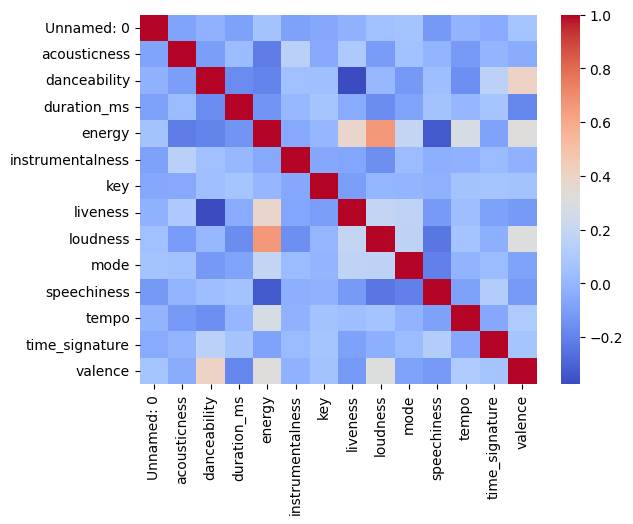

In [8]:
import seaborn as sns 
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

### c) Compute the Principal Components

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [10]:
# Access our 13 PCs 
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=x_features,
                 columns=[f'PC{i}' for i in range(1, 15)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Unnamed: 0,-0.108876,-0.060243,0.117054,-0.587332,-0.093431,0.456160,0.215715,0.290148,-0.350592,0.341190,0.133062,0.033184,-0.141119,0.016692
acousticness,0.127787,0.208325,0.466468,0.287520,0.067426,-0.063878,-0.348225,0.394172,-0.471685,-0.178929,0.130787,-0.172199,-0.125165,0.194489
danceability,0.123727,-0.598298,0.187441,0.022130,-0.024637,-0.004533,-0.052491,-0.042194,0.148374,-0.153221,-0.033444,0.346202,-0.603348,0.235478
duration_ms,0.175890,0.219032,-0.358795,0.241845,-0.083170,0.224407,0.137156,0.614449,0.364490,-0.095069,0.272678,0.230894,-0.103083,0.006878
energy,-0.569302,-0.006182,-0.097142,0.123722,0.041363,-0.095782,0.103127,0.051827,0.087258,0.158954,0.071323,-0.075423,0.080445,0.759460
instrumentalness,0.113386,0.029077,0.374394,0.411689,0.440245,0.173393,0.351579,-0.137104,0.161075,0.502502,0.120543,-0.035437,-0.070630,-0.105478
key,0.012151,-0.123259,-0.364640,0.354163,-0.211062,0.392960,-0.524553,-0.216598,-0.210273,0.395372,0.039063,0.026773,-0.049420,-0.003533
liveness,-0.297196,0.407109,0.073188,0.047708,-0.117629,-0.333528,-0.046102,0.032028,-0.116725,0.274901,-0.241413,0.609348,-0.238813,-0.185105
loudness,-0.489514,-0.145229,0.016707,0.070436,-0.161089,-0.182485,-0.071482,0.141290,0.169551,0.045439,0.260827,-0.459386,-0.368505,-0.451717
mode,-0.217643,0.190410,0.313367,0.124149,-0.385219,0.334815,0.139459,-0.396956,0.016522,-0.363765,0.419221,0.220499,0.088071,-0.022946


### **d) Project our dataset into this new space of PCs**

In [11]:
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 15)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.386720,-0.652863,0.833564,-0.264780,-0.431692,1.096173,0.065102,0.415688,-0.425354,-0.052165,0.411226,0.163725,-0.037779,0.437608
1,-0.022807,0.121848,-0.783496,0.643241,-0.208318,0.363151,-0.067209,-1.199774,-0.646060,-0.410133,0.752344,0.176236,-0.408755,-0.099995
2,-2.307955,0.965942,-0.565377,-0.091242,-0.471696,0.127986,0.695080,-0.462656,-0.145077,0.423172,0.137505,0.530706,-0.449822,-0.378736
3,-1.879048,-0.186139,0.845148,0.056289,-0.384031,0.703488,-0.179677,0.566574,-1.150874,0.258471,0.153205,1.254107,-0.255344,-0.270308
4,-1.585990,-2.488711,0.663818,-0.467852,-0.451646,1.160691,0.112007,-0.147954,0.007267,0.025883,0.666961,0.268247,0.136243,0.407630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201644,-0.925985,0.975635,0.015509,-0.057983,0.194629,-0.100156,1.109981,-0.426179,0.186626,-1.337793,0.419054,-0.960825,-0.686250,0.141203
201645,3.296406,1.371223,-0.776801,0.543627,0.064319,1.013066,-1.097510,0.509980,0.008153,-0.388676,-0.791358,-0.612666,-0.257054,-0.502285
201646,1.733949,-0.441971,-1.852705,2.270114,-2.051775,-0.866797,0.888221,0.796172,0.532122,0.420418,-0.372099,-1.268967,0.160158,-0.362663
201647,1.174941,-0.160813,0.601601,-1.608056,-0.965724,0.531404,1.258969,-0.003854,1.117384,-0.213921,0.527621,1.095493,0.018176,-0.003546


✅ As expected, the PCA reduces multicolinearity to the absolute minimum (0)!

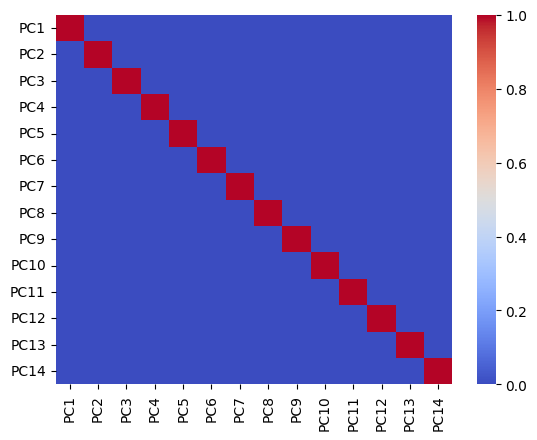

In [12]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

✅ Our tracks dataset is also easier to observe in this new space

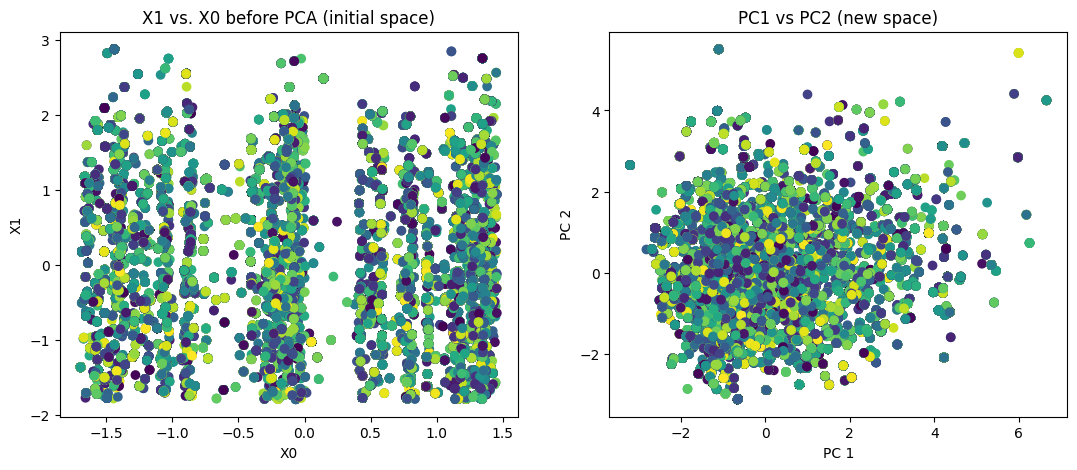

In [13]:
# 2D-slice
import matplotlib.pyplot as plt

N=201649
colors = np.random.rand(N)


plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors)

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=colors);

### PCs are ranked by order of importance

In [14]:
# Sklearn provides it automatically
pca.explained_variance_ratio_

array([0.17344925, 0.12871066, 0.09098448, 0.08165805, 0.07688834,
       0.07422475, 0.06603032, 0.06205918, 0.06029908, 0.05309953,
       0.0474914 , 0.03969852, 0.02987801, 0.01552842])

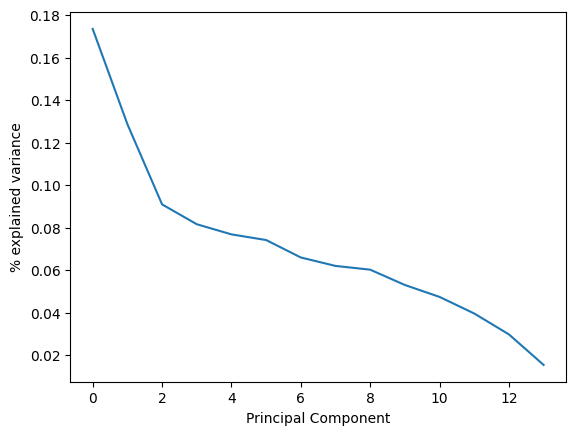

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

### PCA for dimensionality reduction

👉 Having computed all PCs, we can now keep only the k most important ones!

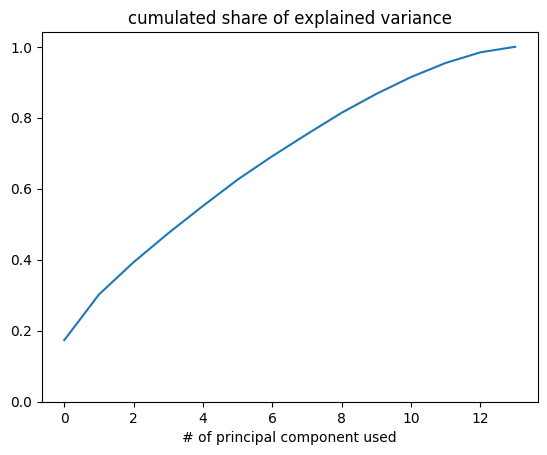

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

### ✏️ Test Model Performance (with k=3 Dimensions)

In [17]:
# Fit a PCA with only 3 components
pca3 = PCA(n_components=3).fit(X)

# Project your data into 3 dimensions
X_proj3 = pd.DataFrame(pca3.fit_transform(X), columns=['PC1', 'PC2', 'PC3'])

# We have "compressed" our dataset in 3D
X_proj3

,PC1,PC2,PC3
0,-1.386819,-0.652314,0.834194
1,-0.022914,0.122472,-0.782689
2,-2.308086,0.966714,-0.564405
3,-1.879310,-0.184592,0.847151
4,-1.586055,-2.488357,0.664186
...,...,...,...
201644,-0.925969,0.975509,0.015263
201645,3.296518,1.370594,-0.777524
201646,1.734263,-0.443769,-1.854791
201647,1.174774,-0.159859,0.602687


# 2. Clustering (Intro Through K-Means)

In [18]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=3)
km.fit(X_proj)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
# The 3 centroids' coordinates (expressed in the space of PCs)
km.cluster_centers_.shape

(3, 14)

In [20]:
# The X observations are classified automatically
km.labels_

array([1, 1, 2, ..., 0, 0, 1], dtype=int32)

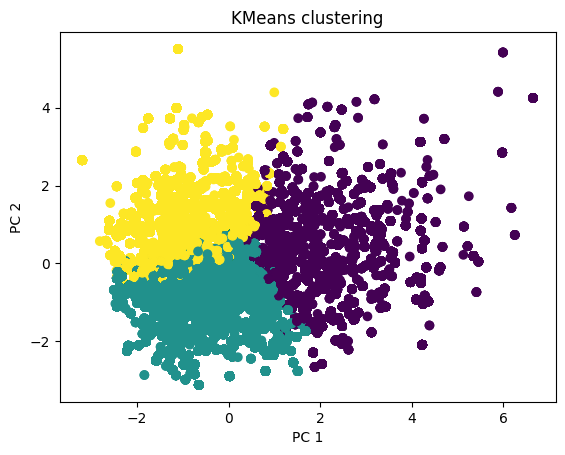

In [21]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [22]:
# Tarefas: 
#    1) filtrar dataset e colocar somente numeros de qualidade da track
#    2) como evaluation without y ?
#    3) enviar bio e kaggle notebook pra victor
#    4) github

# normalizing : https://stats.stackexchange.com/questions/363889/which-type-of-data-normalizing-should-be-used-with-knn#:~:text=Standardization%2C%20on%20the%20other%20hand%2C%20does%20have%20many%20useful%20properties%2C%20but%20can%27t%20ensure%20that%20the%20features%20are%20mapped%20to%20the%20same%20range